# Data augmentation
If you know CNNs, you'll be aware that they are scale or rotation invariant. This implies that when a CNN's weights are trained and optimised on a set of images, if that same CNN is used to classify those images, rotated, scaled, zoomed or in a different contrast, it'll likely misclassify it. 

In [1]:
# Import necessary packages.
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Important constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

Tensorflow has a fantastic data pipeline which can be used to load a dataset, and perform all sort of transformation on said dataset. 

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ifunanyaScript\Everything\BrainTumour_DiagnosisApp\data\clean_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE),
)

Found 3000 files belonging to 2 classes.


The above api scans the directory path passed as an argument.  
Then, stores the sub directory(s) names as classes/labels and all the corresponding files as images belonging to their respective classes.

In [29]:
label_names = dataset.class_names
label_names

['no_tumour', 'tumour']

In [6]:
len(dataset)

94

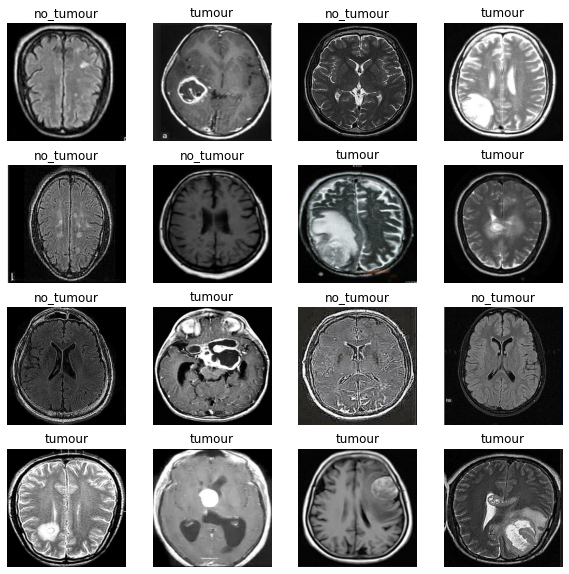

In [48]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_names[label_batch[i]])
        plt.axis("off")

In [49]:
train_size = 0.8
len(dataset)*train_size

75.2

In [50]:
train_ds = dataset.take(75)
len(train_ds)

75

In [51]:
test_ds = dataset.skip(75)
len(test_ds)

19

In [52]:
val_size = 0.1
len(dataset)*val_size

9.4

In [53]:
val_ds = test_ds.take(9)
len(val_ds)

9

In [54]:
test_ds = test_ds.skip(9)
len(test_ds)

10

In [60]:
def chunking(dataset, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, buffer=1000):
    
    dataset_length = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(buffer, seed=321)
    
    train_size = int(train_split*dataset_length)
    validation_size = int(validation_split*dataset_length)
    
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(validation_size)
    test_ds = dataset.skip(train_size).skip(validation_size)
    
    return train_ds, val_ds, test_ds

In [61]:
train_ds, val_ds, test_ds = chunking(dataset)

In [63]:
len(train_ds), len(val_ds), len(test_ds)

(75, 9, 10)

In [64]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [66]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [68]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.7)
])

In [ ]:
# ifunanyaScript